<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.7
Notebook id          : MNIST1
Run time             : Wednesday 27 January 2021, 18:22:21
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

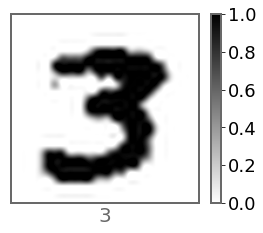

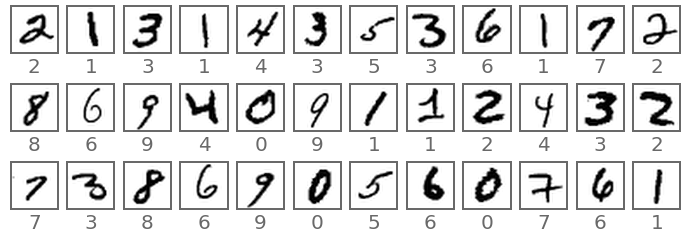

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 0s - loss: 2.4156 - accuracy: 0.0859

 27/118 [=====>........................] - ETA: 0s - loss: 1.3908 - accuracy: 0.6293

 54/118 [============>.................] - ETA: 0s - loss: 0.9265 - accuracy: 0.7484

 81/118 [===================>..........] - ETA: 0s - loss: 0.7321 - accuracy: 0.7990

108/118 [==========================>...] - ETA: 0s - loss: 0.6206 - accuracy: 0.8285

118/118 [==============================] - 1s 5ms/step - loss: 0.5933 - accuracy: 0.8359 - val_loss: 0.2527 - val_accuracy: 0.9258


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2542 - accuracy: 0.9297

 28/118 [======>.......................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9255

 55/118 [============>.................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9310

 82/118 [===================>..........] - ETA: 0s - loss: 0.2325 - accuracy: 0.9337

109/118 [==========================>...] - ETA: 0s - loss: 0.2256 - accuracy: 0.9356

118/118 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9362 - val_loss: 0.1832 - val_accuracy: 0.9450


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9512

 28/118 [======>.......................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9507

 55/118 [============>.................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9504

 82/118 [===================>..........] - ETA: 0s - loss: 0.1677 - accuracy: 0.9520

109/118 [==========================>...] - ETA: 0s - loss: 0.1648 - accuracy: 0.9526

118/118 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9530 - val_loss: 0.1469 - val_accuracy: 0.9573


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1083 - accuracy: 0.9746

 28/118 [======>.......................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9606

 55/118 [============>.................] - ETA: 0s - loss: 0.1362 - accuracy: 0.9613

 82/118 [===================>..........] - ETA: 0s - loss: 0.1321 - accuracy: 0.9619

109/118 [==========================>...] - ETA: 0s - loss: 0.1306 - accuracy: 0.9626

118/118 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9627 - val_loss: 0.1223 - val_accuracy: 0.9626


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.1002 - accuracy: 0.9746

 28/118 [======>.......................] - ETA: 0s - loss: 0.1033 - accuracy: 0.9705

 55/118 [============>.................] - ETA: 0s - loss: 0.1069 - accuracy: 0.9691

 82/118 [===================>..........] - ETA: 0s - loss: 0.1078 - accuracy: 0.9686

109/118 [==========================>...] - ETA: 0s - loss: 0.1072 - accuracy: 0.9690

118/118 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 0.9689 - val_loss: 0.1086 - val_accuracy: 0.9659


Epoch 6/16


  1/118 [..............................] - ETA: 0s - loss: 0.0769 - accuracy: 0.9766

 28/118 [======>.......................] - ETA: 0s - loss: 0.0903 - accuracy: 0.9743

 55/118 [============>.................] - ETA: 0s - loss: 0.0875 - accuracy: 0.9747

 82/118 [===================>..........] - ETA: 0s - loss: 0.0893 - accuracy: 0.9736

109/118 [==========================>...] - ETA: 0s - loss: 0.0911 - accuracy: 0.9731

118/118 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9731 - val_loss: 0.0991 - val_accuracy: 0.9687


Epoch 7/16


  1/118 [..............................] - ETA: 0s - loss: 0.1014 - accuracy: 0.9609

 28/118 [======>.......................] - ETA: 0s - loss: 0.0780 - accuracy: 0.9766

 55/118 [============>.................] - ETA: 0s - loss: 0.0771 - accuracy: 0.9771

 82/118 [===================>..........] - ETA: 0s - loss: 0.0781 - accuracy: 0.9767

110/118 [==========================>...] - ETA: 0s - loss: 0.0778 - accuracy: 0.9768

118/118 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9768 - val_loss: 0.0957 - val_accuracy: 0.9692


Epoch 8/16


  1/118 [..............................] - ETA: 0s - loss: 0.0610 - accuracy: 0.9863

 28/118 [======>.......................] - ETA: 0s - loss: 0.0686 - accuracy: 0.9806

 55/118 [============>.................] - ETA: 0s - loss: 0.0662 - accuracy: 0.9812

 82/118 [===================>..........] - ETA: 0s - loss: 0.0669 - accuracy: 0.9806

109/118 [==========================>...] - ETA: 0s - loss: 0.0672 - accuracy: 0.9804

118/118 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9804 - val_loss: 0.0820 - val_accuracy: 0.9744


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0726 - accuracy: 0.9766

 28/118 [======>.......................] - ETA: 0s - loss: 0.0565 - accuracy: 0.9837

 55/118 [============>.................] - ETA: 0s - loss: 0.0578 - accuracy: 0.9826

 82/118 [===================>..........] - ETA: 0s - loss: 0.0575 - accuracy: 0.9830

109/118 [==========================>...] - ETA: 0s - loss: 0.0585 - accuracy: 0.9824

118/118 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0829 - val_accuracy: 0.9736


Epoch 10/16


  1/118 [..............................] - ETA: 0s - loss: 0.0472 - accuracy: 0.9883

 28/118 [======>.......................] - ETA: 0s - loss: 0.0486 - accuracy: 0.9861

 55/118 [============>.................] - ETA: 0s - loss: 0.0511 - accuracy: 0.9855

 82/118 [===================>..........] - ETA: 0s - loss: 0.0510 - accuracy: 0.9854

109/118 [==========================>...] - ETA: 0s - loss: 0.0510 - accuracy: 0.9853

118/118 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.0843 - val_accuracy: 0.9759


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0302 - accuracy: 0.9961

 29/118 [======>.......................] - ETA: 0s - loss: 0.0415 - accuracy: 0.9890

 56/118 [=============>................] - ETA: 0s - loss: 0.0430 - accuracy: 0.9881

 84/118 [====================>.........] - ETA: 0s - loss: 0.0450 - accuracy: 0.9868

112/118 [===========================>..] - ETA: 0s - loss: 0.0458 - accuracy: 0.9864

118/118 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0799 - val_accuracy: 0.9743


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0404 - accuracy: 0.9824

 28/118 [======>.......................] - ETA: 0s - loss: 0.0396 - accuracy: 0.9889

 55/118 [============>.................] - ETA: 0s - loss: 0.0401 - accuracy: 0.9887

 82/118 [===================>..........] - ETA: 0s - loss: 0.0397 - accuracy: 0.9885

109/118 [==========================>...] - ETA: 0s - loss: 0.0400 - accuracy: 0.9883

118/118 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0733 - val_accuracy: 0.9782


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0257 - accuracy: 0.9941

 28/118 [======>.......................] - ETA: 0s - loss: 0.0356 - accuracy: 0.9894

 55/118 [============>.................] - ETA: 0s - loss: 0.0331 - accuracy: 0.9904

 82/118 [===================>..........] - ETA: 0s - loss: 0.0345 - accuracy: 0.9899

109/118 [==========================>...] - ETA: 0s - loss: 0.0354 - accuracy: 0.9897

118/118 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0747 - val_accuracy: 0.9781


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0230 - accuracy: 0.9922

 28/118 [======>.......................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9912

 55/118 [============>.................] - ETA: 0s - loss: 0.0304 - accuracy: 0.9917

 82/118 [===================>..........] - ETA: 0s - loss: 0.0322 - accuracy: 0.9912

109/118 [==========================>...] - ETA: 0s - loss: 0.0321 - accuracy: 0.9910

118/118 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9909 - val_loss: 0.0760 - val_accuracy: 0.9780


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0230 - accuracy: 0.9941

 28/118 [======>.......................] - ETA: 0s - loss: 0.0290 - accuracy: 0.9922

 55/118 [============>.................] - ETA: 0s - loss: 0.0271 - accuracy: 0.9931

 82/118 [===================>..........] - ETA: 0s - loss: 0.0274 - accuracy: 0.9928

109/118 [==========================>...] - ETA: 0s - loss: 0.0276 - accuracy: 0.9926

118/118 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.0752 - val_accuracy: 0.9778


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0346 - accuracy: 0.9941

 28/118 [======>.......................] - ETA: 0s - loss: 0.0254 - accuracy: 0.9936

 55/118 [============>.................] - ETA: 0s - loss: 0.0247 - accuracy: 0.9935

 82/118 [===================>..........] - ETA: 0s - loss: 0.0248 - accuracy: 0.9935

110/118 [==========================>...] - ETA: 0s - loss: 0.0243 - accuracy: 0.9936

118/118 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9936 - val_loss: 0.0738 - val_accuracy: 0.9787


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.07380860298871994
Test accuracy : 0.9786999821662903


### 6.2 - Plot history

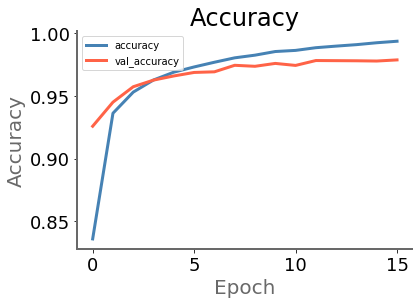

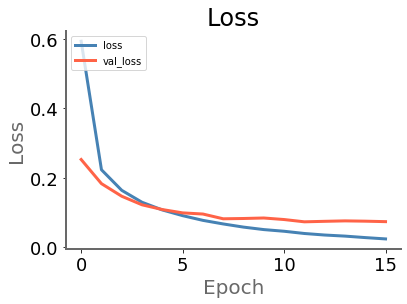

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

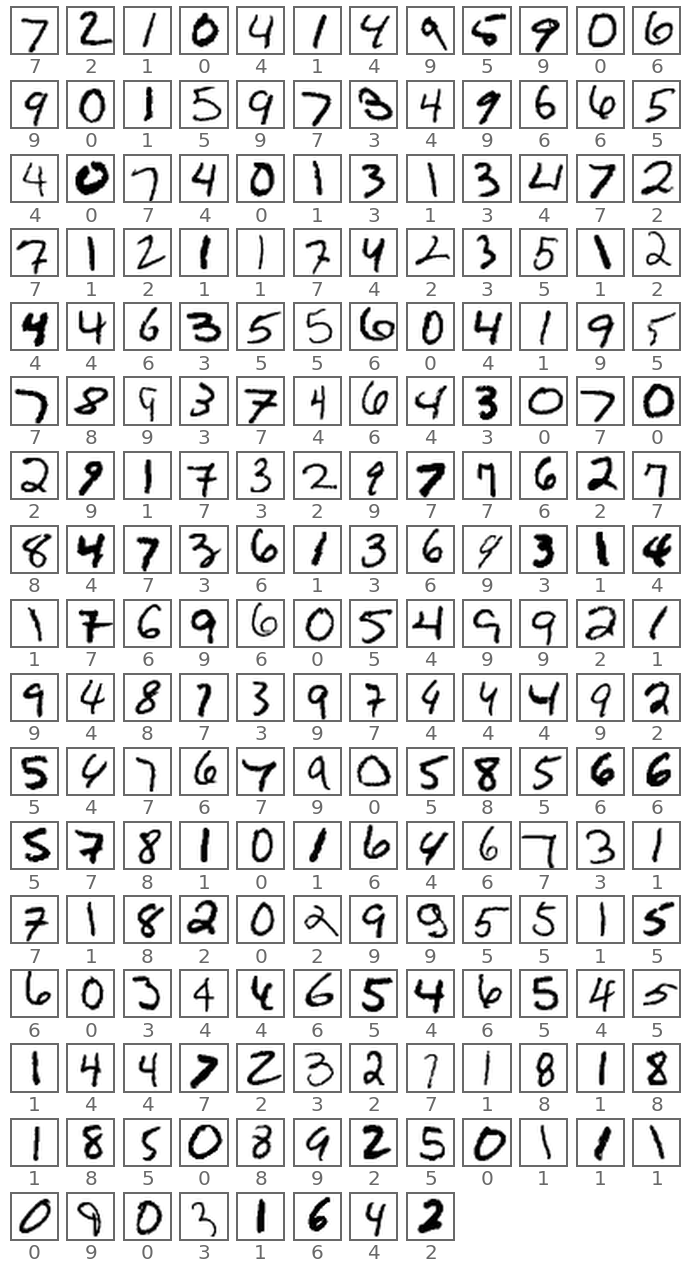

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

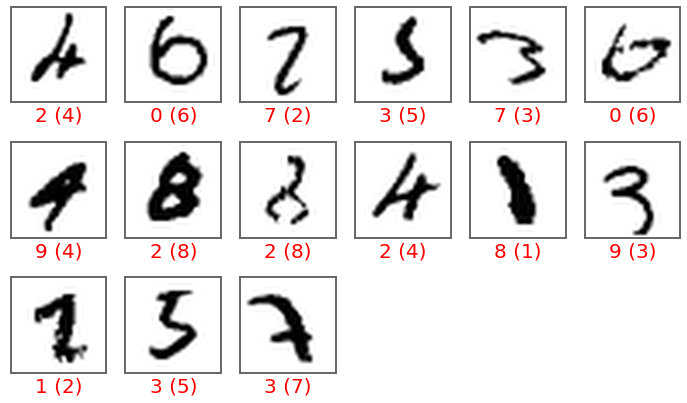

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

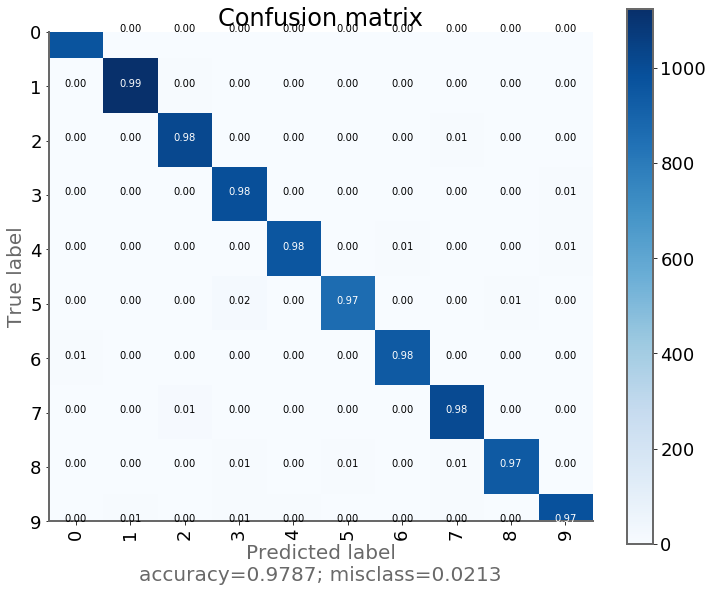

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Wednesday 27 January 2021, 18:23:05
Duration is : 00:00:44 674ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>